# Artificial Neural Network Build

Lets build an artificial neural network

## Imports

In [181]:
import seaborn as sns
import matplotlib.pyplot as plt
from config import MAIN_PALETTE

sns.set_theme(context='notebook', style='whitegrid', palette='bright', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
plt.rcParams["figure.figsize"] = (15,5)

In [182]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
import numpy as np

## Getting data

In [183]:
data_path = '../data/dataset_cleaned.csv'
data = pd.read_csv(data_path)

data

,current_201,current_202,current_203,current_204,current_205,current_206,current_207,current_208,current_209,current_210,...,volt_792,volt_793,volt_794,volt_795,volt_796,volt_797,volt_798,volt_799,volt_800,state
0,0.682921,0.682195,0.681640,0.681171,0.680729,0.680484,0.680928,0.682209,0.683694,0.684659,...,0.406982,0.367278,0.364093,0.402194,0.448523,0.450469,0.356803,0.302953,0.274347,0
1,0.679731,0.678763,0.678157,0.678000,0.678474,0.679554,0.680862,0.681912,0.682436,0.682467,...,0.273656,0.261276,0.271836,0.308600,0.356592,0.389055,0.355631,0.369090,0.410403,0
2,0.692921,0.692640,0.692082,0.691222,0.690065,0.688761,0.687545,0.686558,0.685798,0.685337,...,0.317711,0.297014,0.288137,0.302547,0.330311,0.342483,0.289035,0.271342,0.278585,0
3,0.684316,0.684550,0.684634,0.684632,0.684461,0.683996,0.683266,0.682420,0.681621,0.680988,...,0.265779,0.276489,0.310451,0.382017,0.485955,0.568265,0.505633,0.450684,0.407461,0
4,0.671236,0.670445,0.669661,0.668889,0.668196,0.667722,0.667399,0.667360,0.668124,0.669890,...,0.415693,0.381110,0.376050,0.407861,0.460601,0.481486,0.389891,0.325563,0.281171,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.655160,0.654703,0.654392,0.654158,0.654086,0.654370,0.655265,0.656777,0.658473,0.659922,...,0.085348,0.067686,0.062863,0.078773,0.102914,0.117693,0.097859,0.085690,0.079646,2
475,0.688720,0.691066,0.693366,0.695296,0.696822,0.698040,0.699004,0.699738,0.700179,0.700178,...,0.243962,0.250543,0.279990,0.333953,0.393716,0.419058,0.355549,0.327488,0.312347,2
476,0.717838,0.716938,0.715976,0.714911,0.713888,0.712956,0.711976,0.710904,0.709947,0.709364,...,0.269906,0.262787,0.261464,0.268023,0.270470,0.250558,0.187487,0.160850,0.156544,2
477,0.671228,0.671696,0.671971,0.672160,0.672397,0.672658,0.672790,0.672632,0.672193,0.671623,...,0.143442,0.139477,0.127960,0.122262,0.118875,0.110584,0.083422,0.073359,0.071337,2


In [184]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

X

,current_201,current_202,current_203,current_204,current_205,current_206,current_207,current_208,current_209,current_210,...,volt_791,volt_792,volt_793,volt_794,volt_795,volt_796,volt_797,volt_798,volt_799,volt_800
0,0.682921,0.682195,0.681640,0.681171,0.680729,0.680484,0.680928,0.682209,0.683694,0.684659,...,0.475171,0.406982,0.367278,0.364093,0.402194,0.448523,0.450469,0.356803,0.302953,0.274347
1,0.679731,0.678763,0.678157,0.678000,0.678474,0.679554,0.680862,0.681912,0.682436,0.682467,...,0.313650,0.273656,0.261276,0.271836,0.308600,0.356592,0.389055,0.355631,0.369090,0.410403
2,0.692921,0.692640,0.692082,0.691222,0.690065,0.688761,0.687545,0.686558,0.685798,0.685337,...,0.346655,0.317711,0.297014,0.288137,0.302547,0.330311,0.342483,0.289035,0.271342,0.278585
3,0.684316,0.684550,0.684634,0.684632,0.684461,0.683996,0.683266,0.682420,0.681621,0.680988,...,0.277664,0.265779,0.276489,0.310451,0.382017,0.485955,0.568265,0.505633,0.450684,0.407461
4,0.671236,0.670445,0.669661,0.668889,0.668196,0.667722,0.667399,0.667360,0.668124,0.669890,...,0.474643,0.415693,0.381110,0.376050,0.407861,0.460601,0.481486,0.389891,0.325563,0.281171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.655160,0.654703,0.654392,0.654158,0.654086,0.654370,0.655265,0.656777,0.658473,0.659922,...,0.118411,0.085348,0.067686,0.062863,0.078773,0.102914,0.117693,0.097859,0.085690,0.079646
475,0.688720,0.691066,0.693366,0.695296,0.696822,0.698040,0.699004,0.699738,0.700179,0.700178,...,0.267515,0.243962,0.250543,0.279990,0.333953,0.393716,0.419058,0.355549,0.327488,0.312347
476,0.717838,0.716938,0.715976,0.714911,0.713888,0.712956,0.711976,0.710904,0.709947,0.709364,...,0.300854,0.269906,0.262787,0.261464,0.268023,0.270470,0.250558,0.187487,0.160850,0.156544
477,0.671228,0.671696,0.671971,0.672160,0.672397,0.672658,0.672790,0.672632,0.672193,0.671623,...,0.149968,0.143442,0.139477,0.127960,0.122262,0.118875,0.110584,0.083422,0.073359,0.071337


To get the best training and testing datasets, we're going to balance the amount of each state.
We're going to use:

Training:
120 from state 0
85 from state 1
85 from state 2

In [185]:
df_0 = data.query('state == 0')
df_1 = data.query('state == 1')
df_2 = data.query('state == 2')

print('State 0 shape:', df_0.shape)
print('State 1 shape:', df_1.shape)
print('State 2 shape:', df_2.shape)

State 0 shape: (288, 1201)
State 1 shape: (97, 1201)
State 2 shape: (94, 1201)


Get X_train and X_test

In [186]:
state0_train_size = 125
state1_train_size = 85
state2_train_size = 85

# state 0
X_train_0 = df_0.iloc[:state0_train_size, :-1]
X_test_0 = df_0.iloc[state0_train_size:, :-1]

y_train_0 = df_0.iloc[:state0_train_size, -1]
y_test_0 = df_0.iloc[state0_train_size:, -1]

# state 1
X_train_1 = df_1.iloc[:state1_train_size, :-1]
X_test_1 = df_1.iloc[state1_train_size:, :-1]

y_train_1 = df_1.iloc[:state1_train_size, -1]
y_test_1 = df_1.iloc[state1_train_size:, -1]

# state 2
X_train_2 = df_2.iloc[:state2_train_size, :-1]
X_test_2 = df_2.iloc[state2_train_size:, :-1]

y_train_2 = df_2.iloc[:state2_train_size, -1]
y_test_2 = df_2.iloc[state2_train_size:, -1]

# Concatenate
X_train = pd.concat([X_train_0, X_train_1, X_train_2])
X_test = pd.concat([X_test_0, X_test_1, X_test_2])

y_train = pd.concat([y_train_0, y_train_1, y_train_2])
y_test = pd.concat([y_test_0, y_test_1, y_test_2])

print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
print("==========")
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)

X_test shape (184, 1200)
y_test shape (184,)
X_train shape (295, 1200)
y_train shape (295,)


In [187]:
X_train

,current_201,current_202,current_203,current_204,current_205,current_206,current_207,current_208,current_209,current_210,...,volt_791,volt_792,volt_793,volt_794,volt_795,volt_796,volt_797,volt_798,volt_799,volt_800
0,0.682921,0.682195,0.681640,0.681171,0.680729,0.680484,0.680928,0.682209,0.683694,0.684659,...,0.475171,0.406982,0.367278,0.364093,0.402194,0.448523,0.450469,0.356803,0.302953,0.274347
1,0.679731,0.678763,0.678157,0.678000,0.678474,0.679554,0.680862,0.681912,0.682436,0.682467,...,0.313650,0.273656,0.261276,0.271836,0.308600,0.356592,0.389055,0.355631,0.369090,0.410403
2,0.692921,0.692640,0.692082,0.691222,0.690065,0.688761,0.687545,0.686558,0.685798,0.685337,...,0.346655,0.317711,0.297014,0.288137,0.302547,0.330311,0.342483,0.289035,0.271342,0.278585
3,0.684316,0.684550,0.684634,0.684632,0.684461,0.683996,0.683266,0.682420,0.681621,0.680988,...,0.277664,0.265779,0.276489,0.310451,0.382017,0.485955,0.568265,0.505633,0.450684,0.407461
4,0.671236,0.670445,0.669661,0.668889,0.668196,0.667722,0.667399,0.667360,0.668124,0.669890,...,0.474643,0.415693,0.381110,0.376050,0.407861,0.460601,0.481486,0.389891,0.325563,0.281171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0.699013,0.700283,0.701001,0.701229,0.701127,0.700915,0.700716,0.700710,0.700854,0.700750,...,0.164359,0.156490,0.160885,0.174962,0.209262,0.245508,0.258957,0.223890,0.225651,0.280271
466,0.693254,0.693763,0.694442,0.695615,0.697754,0.700593,0.703291,0.705338,0.706631,0.707332,...,0.335628,0.430326,0.492045,0.491282,0.453160,0.393129,0.308887,0.198685,0.149238,0.125311
467,0.686958,0.686474,0.685674,0.684757,0.683837,0.683164,0.682842,0.682819,0.683196,0.683973,...,0.173705,0.166870,0.171276,0.188868,0.235896,0.324066,0.461164,0.508763,0.510587,0.458503
468,0.652792,0.653381,0.654533,0.656147,0.657785,0.659059,0.659839,0.660204,0.660300,0.660191,...,0.193938,0.162887,0.151263,0.158412,0.186152,0.202066,0.179934,0.118501,0.085939,0.069742


In [188]:
X_test

,current_201,current_202,current_203,current_204,current_205,current_206,current_207,current_208,current_209,current_210,...,volt_791,volt_792,volt_793,volt_794,volt_795,volt_796,volt_797,volt_798,volt_799,volt_800
125,0.691468,0.691919,0.691857,0.691331,0.690484,0.689532,0.688726,0.688130,0.687714,0.687552,...,0.403621,0.342177,0.314036,0.318342,0.356268,0.401804,0.407339,0.316755,0.256458,0.221252
126,0.689295,0.688282,0.687451,0.686783,0.686297,0.686016,0.686165,0.687262,0.689330,0.691714,...,0.323495,0.293242,0.277765,0.266636,0.272530,0.298734,0.329949,0.307095,0.308849,0.322219
127,0.704625,0.703717,0.703216,0.703154,0.703356,0.703613,0.703891,0.704373,0.705145,0.705897,...,0.235213,0.212009,0.232290,0.283721,0.357671,0.427205,0.455655,0.389299,0.366152,0.376777
128,0.702460,0.702957,0.704118,0.705578,0.706766,0.707387,0.707607,0.707736,0.707861,0.707882,...,0.455123,0.387404,0.347294,0.338249,0.361233,0.389561,0.377679,0.282076,0.228494,0.216340
129,0.711864,0.710469,0.708822,0.707448,0.706760,0.706676,0.706796,0.706901,0.706971,0.707142,...,0.306752,0.308216,0.310868,0.323062,0.364767,0.443387,0.525665,0.484873,0.442928,0.400778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.655160,0.654703,0.654392,0.654158,0.654086,0.654370,0.655265,0.656777,0.658473,0.659922,...,0.118411,0.085348,0.067686,0.062863,0.078773,0.102914,0.117693,0.097859,0.085690,0.079646
475,0.688720,0.691066,0.693366,0.695296,0.696822,0.698040,0.699004,0.699738,0.700179,0.700178,...,0.267515,0.243962,0.250543,0.279990,0.333953,0.393716,0.419058,0.355549,0.327488,0.312347
476,0.717838,0.716938,0.715976,0.714911,0.713888,0.712956,0.711976,0.710904,0.709947,0.709364,...,0.300854,0.269906,0.262787,0.261464,0.268023,0.270470,0.250558,0.187487,0.160850,0.156544
477,0.671228,0.671696,0.671971,0.672160,0.672397,0.672658,0.672790,0.672632,0.672193,0.671623,...,0.149968,0.143442,0.139477,0.127960,0.122262,0.118875,0.110584,0.083422,0.073359,0.071337


## Build model

### Useful imports

Making the ANN

In [189]:
early_stopping = True
ann = MLPClassifier(
    hidden_layer_sizes=(150, 300),
    max_iter=300,
    tol=0.0000000001,
    learning_rate_init=0.01,
    solver='adam',
    activation='relu',
    learning_rate='constant',
    verbose=True,
    early_stopping=early_stopping, # needed to get validation_scores stats
)

Train the model

In [190]:
ann.fit(X_train, y_train)

Iteration 1, loss = 3.14859499
Validation score: 0.333333
Iteration 2, loss = 12.69375562
Validation score: 0.633333
Iteration 3, loss = 2.53643968
Validation score: 0.900000
Iteration 4, loss = 0.51297459
Validation score: 0.900000
Iteration 5, loss = 0.39467137
Validation score: 0.733333


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature na

Iteration 6, loss = 0.44178437
Validation score: 0.933333
Iteration 7, loss = 0.34550975
Validation score: 0.900000
Iteration 8, loss = 0.33149023
Validation score: 0.900000
Iteration 9, loss = 0.26637152
Validation score: 0.766667
Iteration 10, loss = 0.36714507
Validation score: 0.900000
Iteration 11, loss = 0.32310378
Validation score: 0.866667


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature na

Iteration 12, loss = 0.29353481
Validation score: 0.733333
Iteration 13, loss = 0.50301102
Validation score: 0.900000
Iteration 14, loss = 0.23952040
Validation score: 0.933333
Iteration 15, loss = 0.18403779
Validation score: 0.900000
Iteration 16, loss = 0.16675498
Validation score: 0.966667
Iteration 17, loss = 0.11739812
Validation score: 0.966667
Iteration 18, loss = 0.10974241
Validation score: 1.000000
Iteration 19, loss = 0.10713124
Validation score: 1.000000
Iteration 20, loss = 0.08414624
Validation score: 0.966667
Iteration 21, loss = 0.08346862
Validation score: 1.000000


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature na

Iteration 22, loss = 0.07489200
Validation score: 1.000000
Iteration 23, loss = 0.06866559
Validation score: 1.000000
Iteration 24, loss = 0.06404727
Validation score: 1.000000
Iteration 25, loss = 0.06585295
Validation score: 1.000000
Iteration 26, loss = 0.06090943
Validation score: 1.000000
Iteration 27, loss = 0.05292313
Validation score: 1.000000
Iteration 28, loss = 0.05950707
Validation score: 1.000000
Iteration 29, loss = 0.05066426
Validation score: 1.000000
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature na

MLPClassifier(early_stopping=True, hidden_layer_sizes=(150, 300),
              learning_rate_init=0.01, max_iter=300, tol=1e-10, verbose=True)

Check if the model is well fitted.

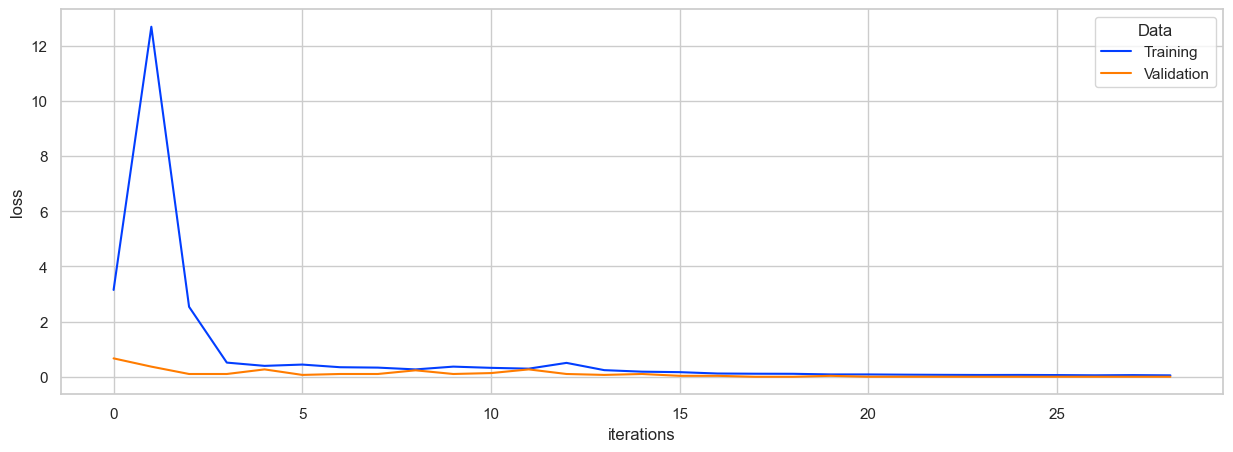

In [191]:
if early_stopping:
    loss_train = ann.loss_curve_
    loss_validation = ann.validation_scores_

    loss_train_df = pd.DataFrame(
        {
            'loss': loss_train,
            'iterations': [x for x in range(len(loss_train))]
        }
    )
    loss_train_df['Data'] = 'Training'

    loss_validation_df = pd.DataFrame(
        {
            'loss': [1 - x for x in loss_validation],
            'iterations': [x for x in range(len(loss_validation))]
        }
    )
    loss_validation_df['Data'] = 'Validation'

    loss_df = pd.concat([loss_train_df, loss_validation_df])

    sns.lineplot(data=loss_df, x='iterations', y='loss', hue='Data')

The plot showed that the model is well fitted as the loss from validation and training datasets are nearly the same in the end of fitting.

## Check Accuracy

Get the score

In [192]:
score = ann.score(X_test, y_test)
y_pred = ann.predict(X_test)


print('%.2f' %(score*100) + '%')

99.46%


Print ROC Curve

In [193]:
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 3 # number of class



# Compute ROC curve and ROC area for each class
# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
#     roc_auc[i] = auc(fpr[i], tpr[i])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

Predict the probability for each state

In [194]:
print("Probability of a random sample of state 0:", np.round(ann.predict_proba(X_test_0[:1]), 4) )
print("Probability of a random sample of state 1:", np.round(ann.predict_proba(X_test_1[:1]), 4) )
print("Probability of a random sample of state 2:", np.round(ann.predict_proba(X_test_2[:1]), 4) )

Probability of a random sample of state 0: [[0.9053 0.     0.0947]]
Probability of a random sample of state 1: [[0. 1. 0.]]
Probability of a random sample of state 2: [[0.0423 0.0023 0.9554]]


ANN Characteristics:

In [195]:
ann.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': True,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (150, 300),
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 300,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 1e-10,
 'validation_fraction': 0.1,
 'verbose': True,
 'warm_start': False}

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
np.random.seed(1)

""" Home-made mini-batch learning
    -> not to be used in out-of-core setting!
"""
N_TRAIN_SAMPLES = X_train.shape[0]
N_EPOCHS = 25
N_BATCH = 128
N_CLASSES = np.unique(y_train)

scores_train = []
scores_test = []

# EPOCH
epoch = 0
while epoch < N_EPOCHS:
    print('epoch: ', epoch)
    # SHUFFLING
    random_perm = np.random.permutation(X_train.shape[0])
    mini_batch_index = 0
    while True:
        # MINI-BATCH
        indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
        ann.partial_fit(X_train[indices], y_train[indices], classes=N_CLASSES)
        mini_batch_index += N_BATCH

        if mini_batch_index >= N_TRAIN_SAMPLES:
            break

    # SCORE TRAIN
    scores_train.append(ann.score(X_train, y_train))

    # SCORE TEST
    scores_test.append(ann.score(X_test, y_test))

    epoch += 1

""" Plot """
plt.plot(scores_train, color='green', alpha=0.8, label='Train')
plt.plot(scores_test, color='magenta', alpha=0.8, label='Test')
plt.title("Accuracy over epochs", fontsize=14)
plt.xlabel('Epochs')
plt.legend(loc='upper left')
plt.show()

epoch:  0


KeyError: "None of [Int64Index([234, 182, 154, 223, 293, 193, 270, 150,  27, 242,\n            ...\n             93, 139,  35, 204,  63,  29,   0, 267,  78,  66],\n           dtype='int64', length=128)] are in the [columns]"